In [1]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 710, done.
remote: Counting objects: 100% (336/336), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 710 (delta 249), reused 202 (delta 201), pack-reused 374
Receiving objects: 100% (710/710), 3.23 MiB | 7.26 MiB/s, done.
Resolving deltas: 100% (294/294), done.


In [12]:
%cd /content/yolov9

/content/yolov9


In [3]:
!pip install -r requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.1 MB/s eta 0:00:00


In [13]:
import os
HOME = os.getcwd()
print(HOME)

/content/yolov9


In [5]:
!wget -P {HOME}/weights -q "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt"
!wget -P {HOME}/weights -q "https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt"

In [8]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z1j09zu3NAGR29SVUvlo")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [10]:
!python 'train_dual.py' --workers 8 --device 0 --batch 8 --data 'PPE_Detection-1/data.yaml' --img 640 --cfg models/detect/yolov9-c.yaml --weights 'weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 30 --close-mosaic 15

2024-06-02 06:19:23.804969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 06:19:23.805024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 06:19:23.806340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-02 06:19:23.813732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 06:19:25.095298: W tensorflow/compiler/tf2

In [14]:
!ls {HOME}/runs/train/yolov9-e-finetuning

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1717309166.0eb6b880102f.2772.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [15]:
from IPython.display import Image

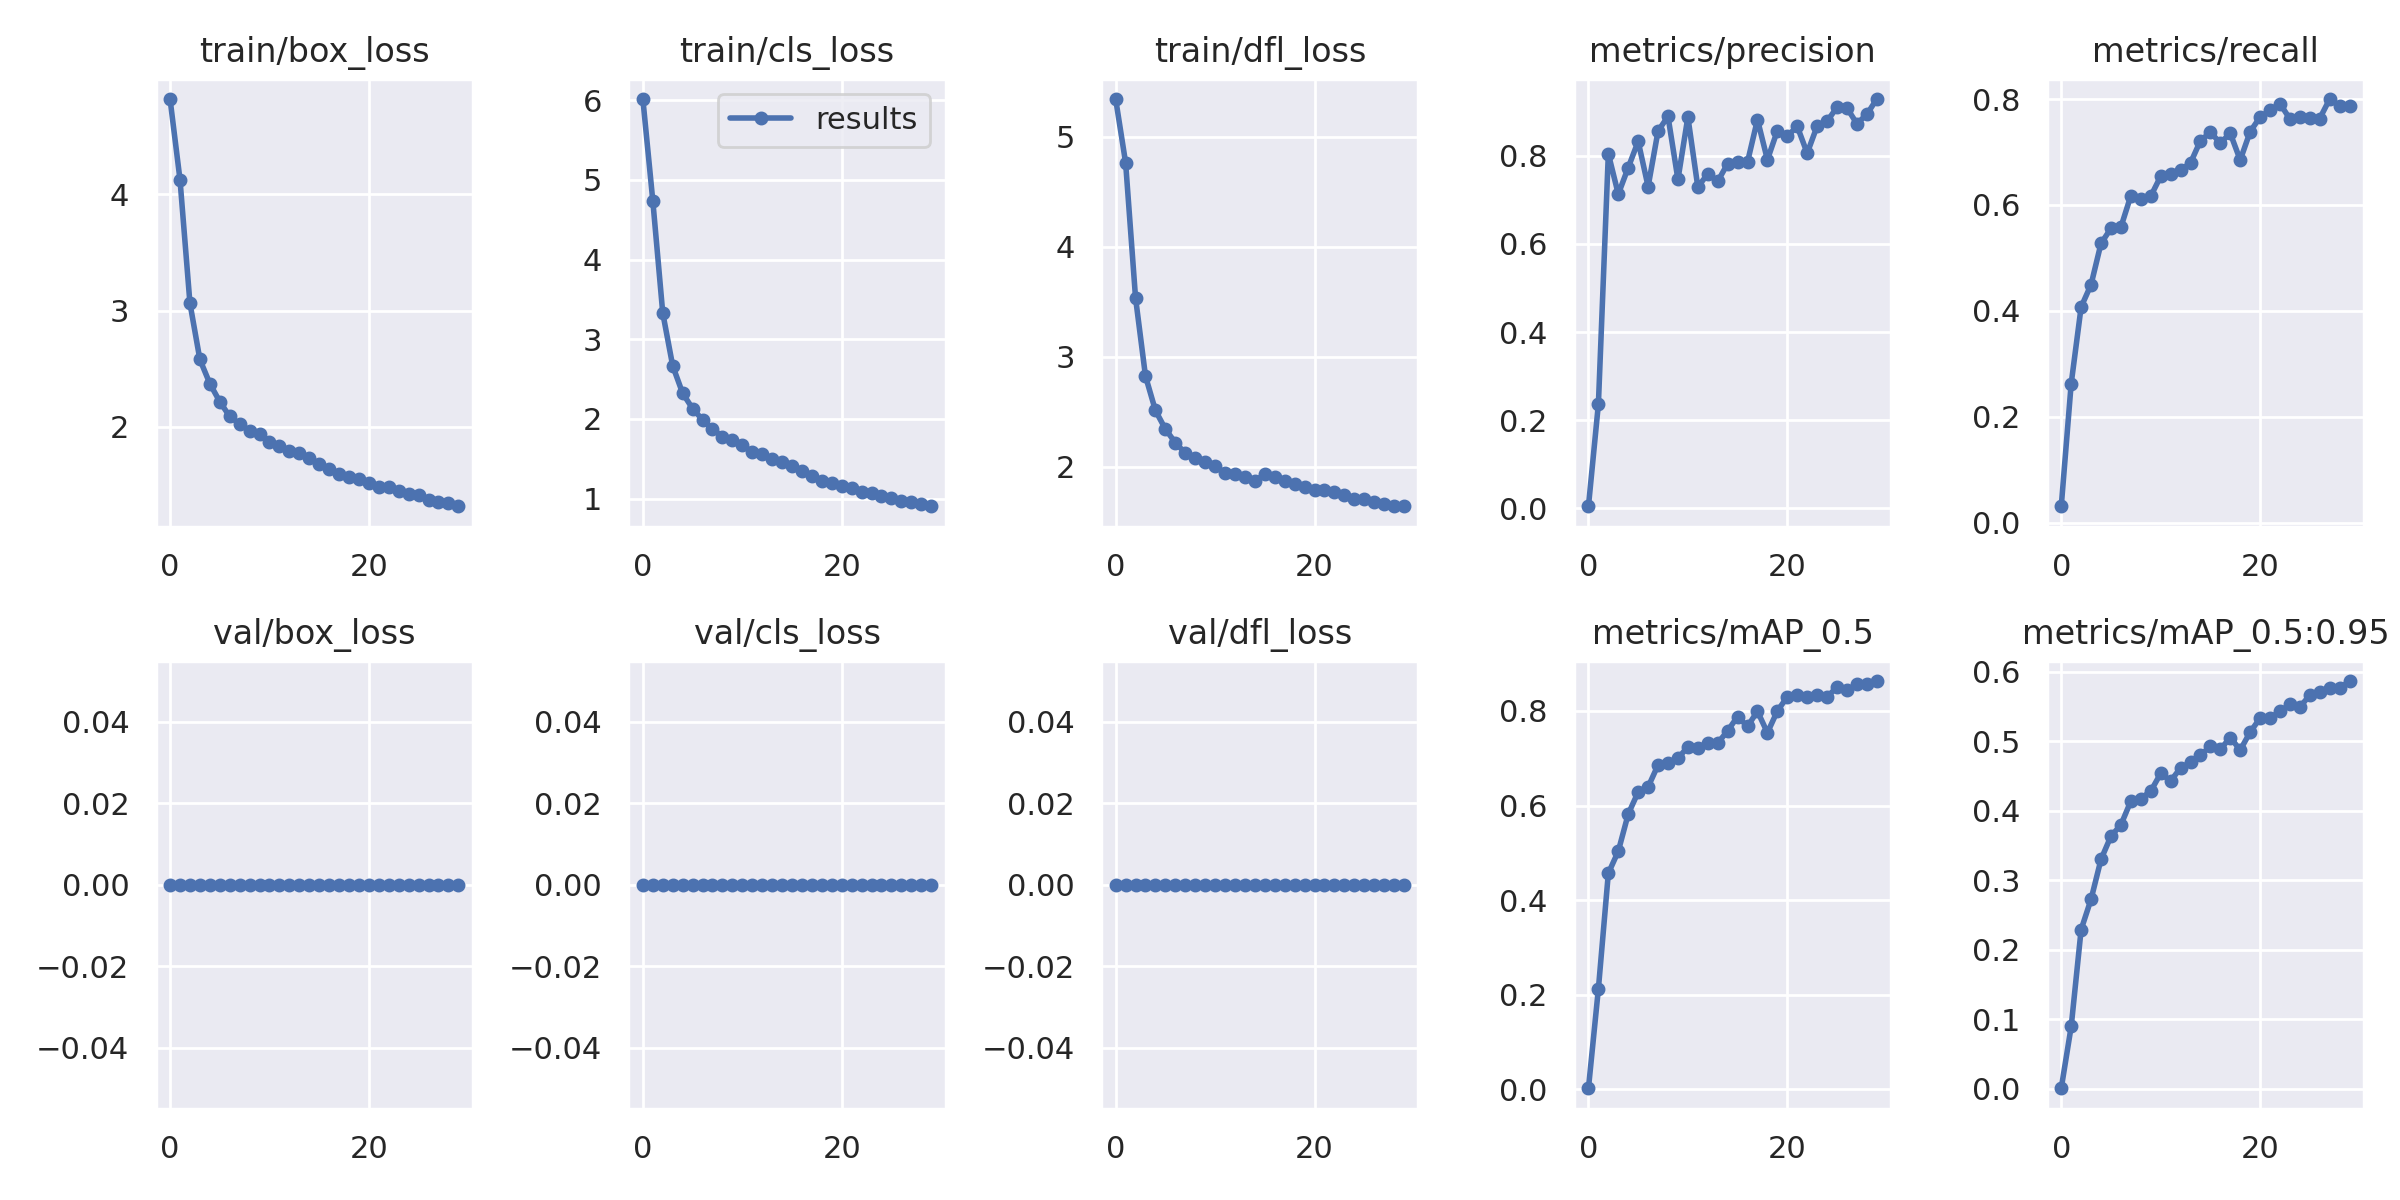

In [19]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/results.png", width=1000)

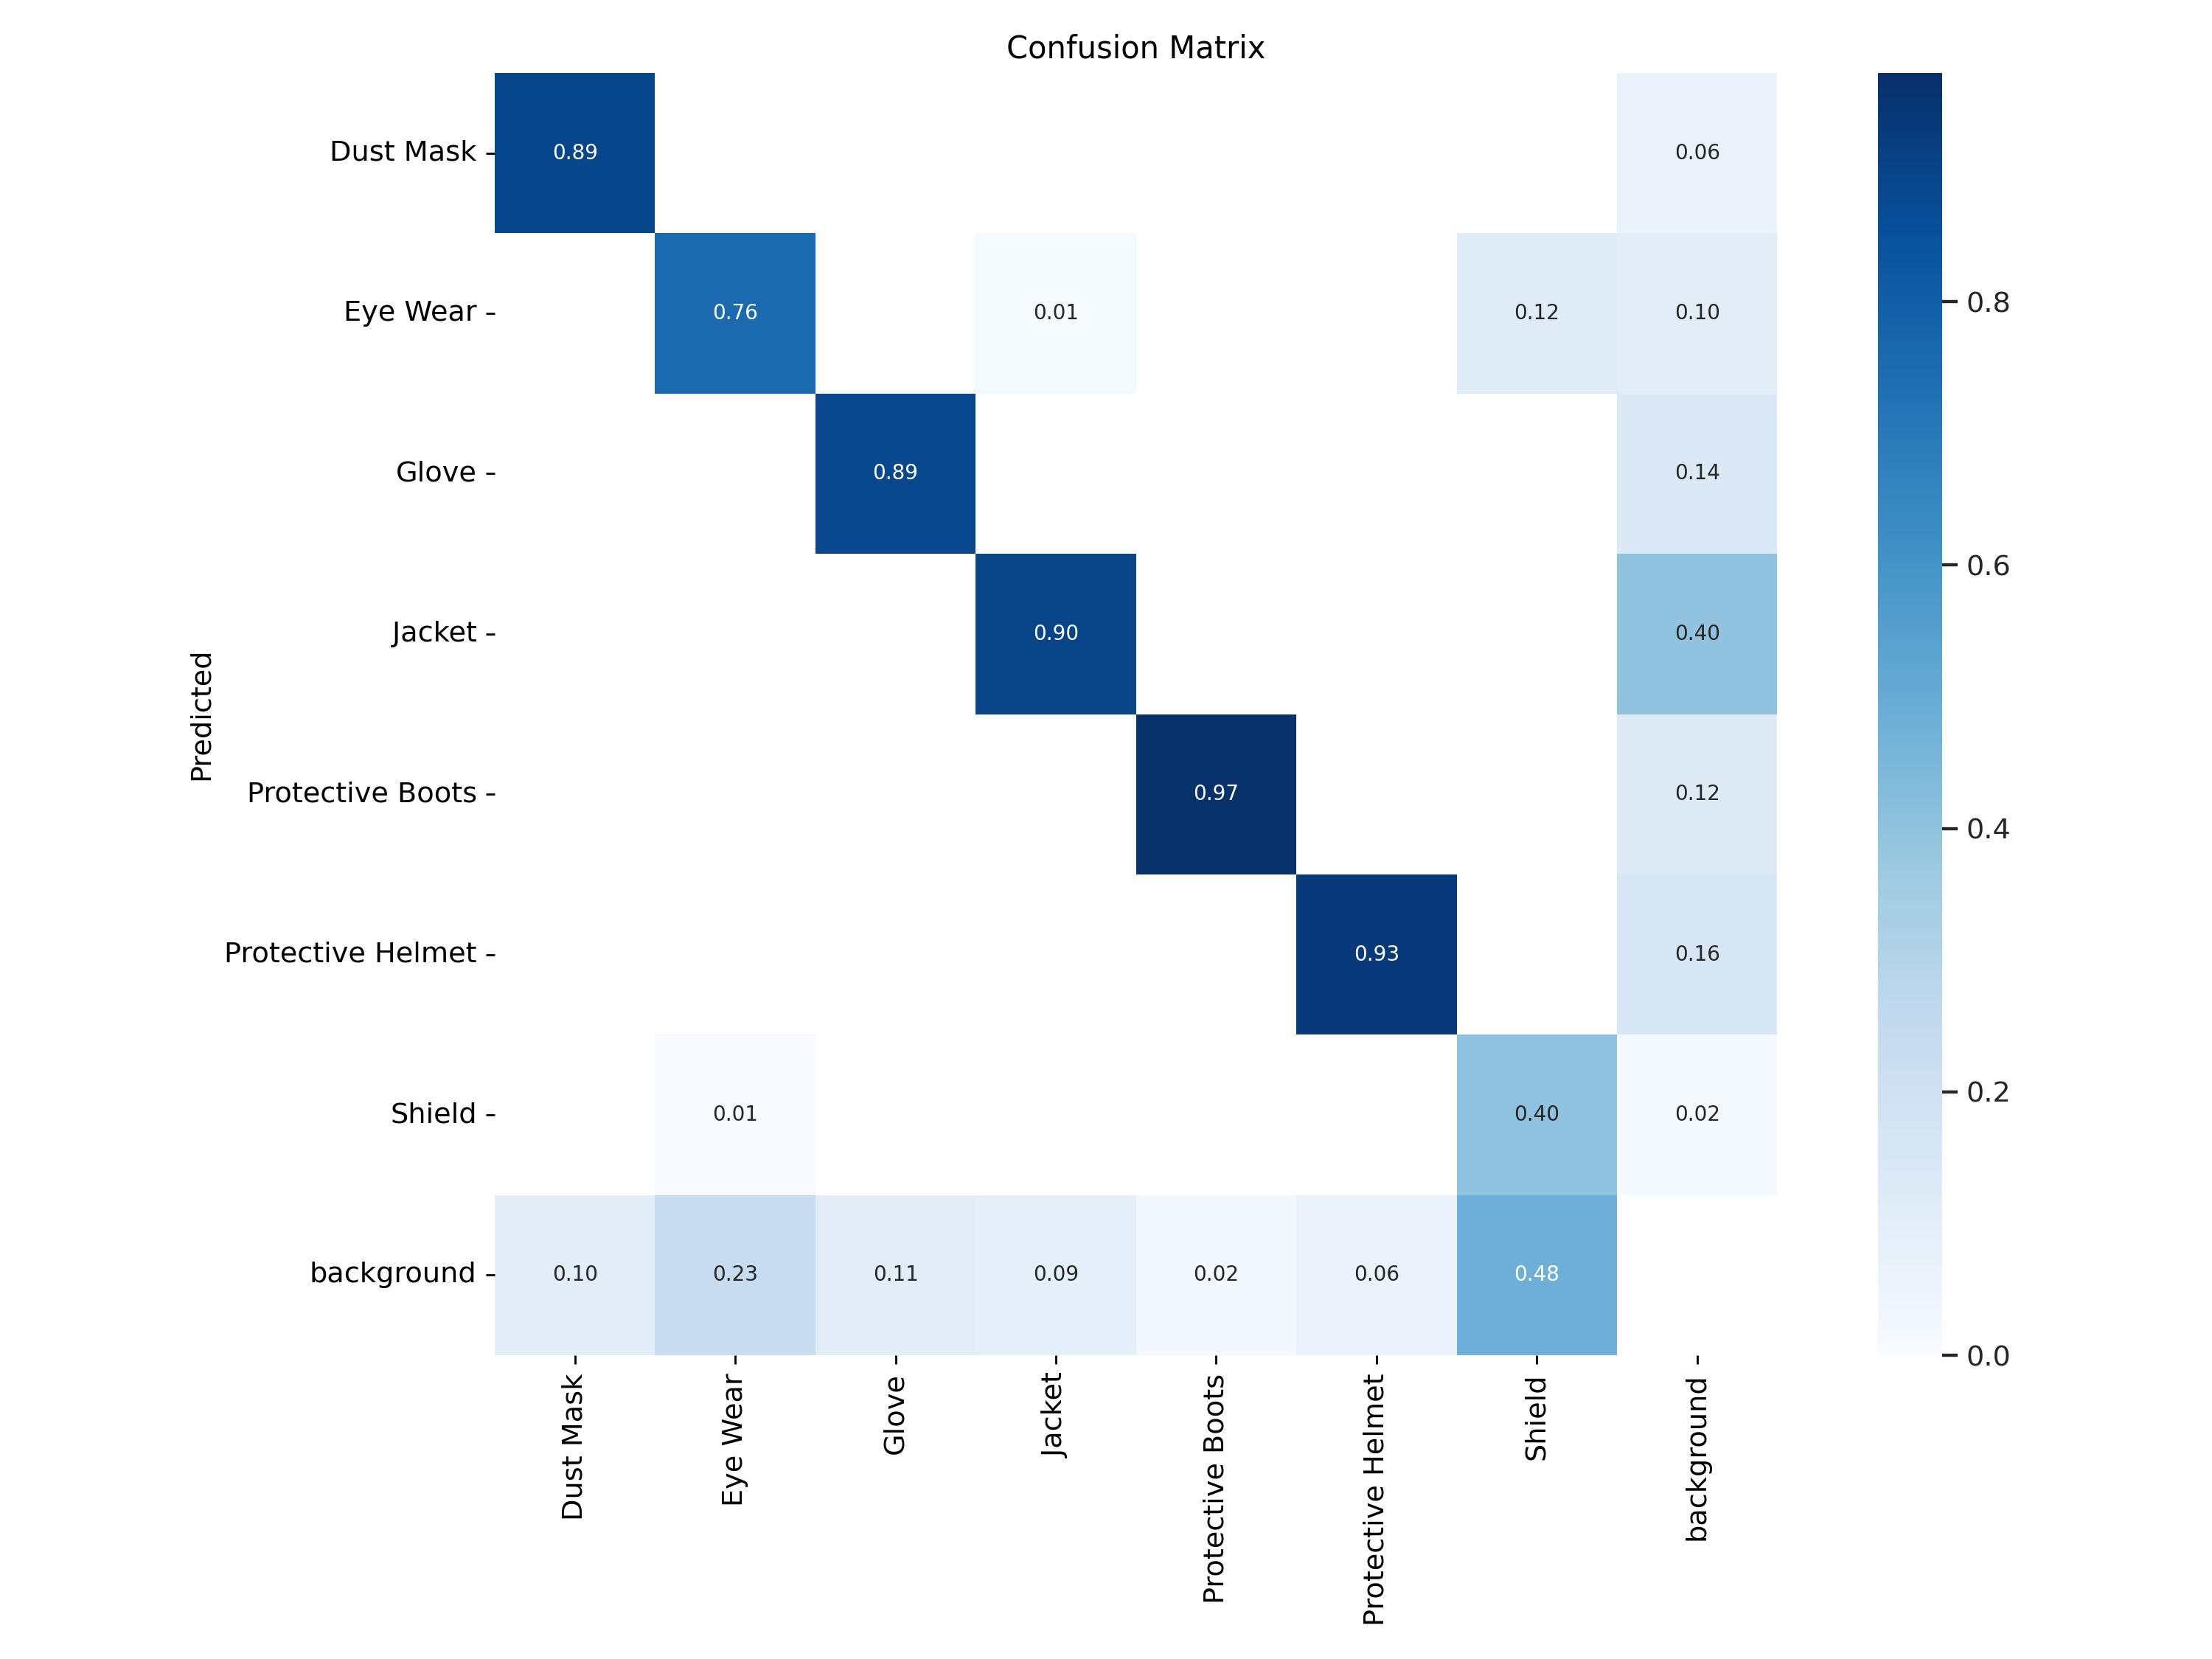

In [20]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/confusion_matrix.png", width=1000)

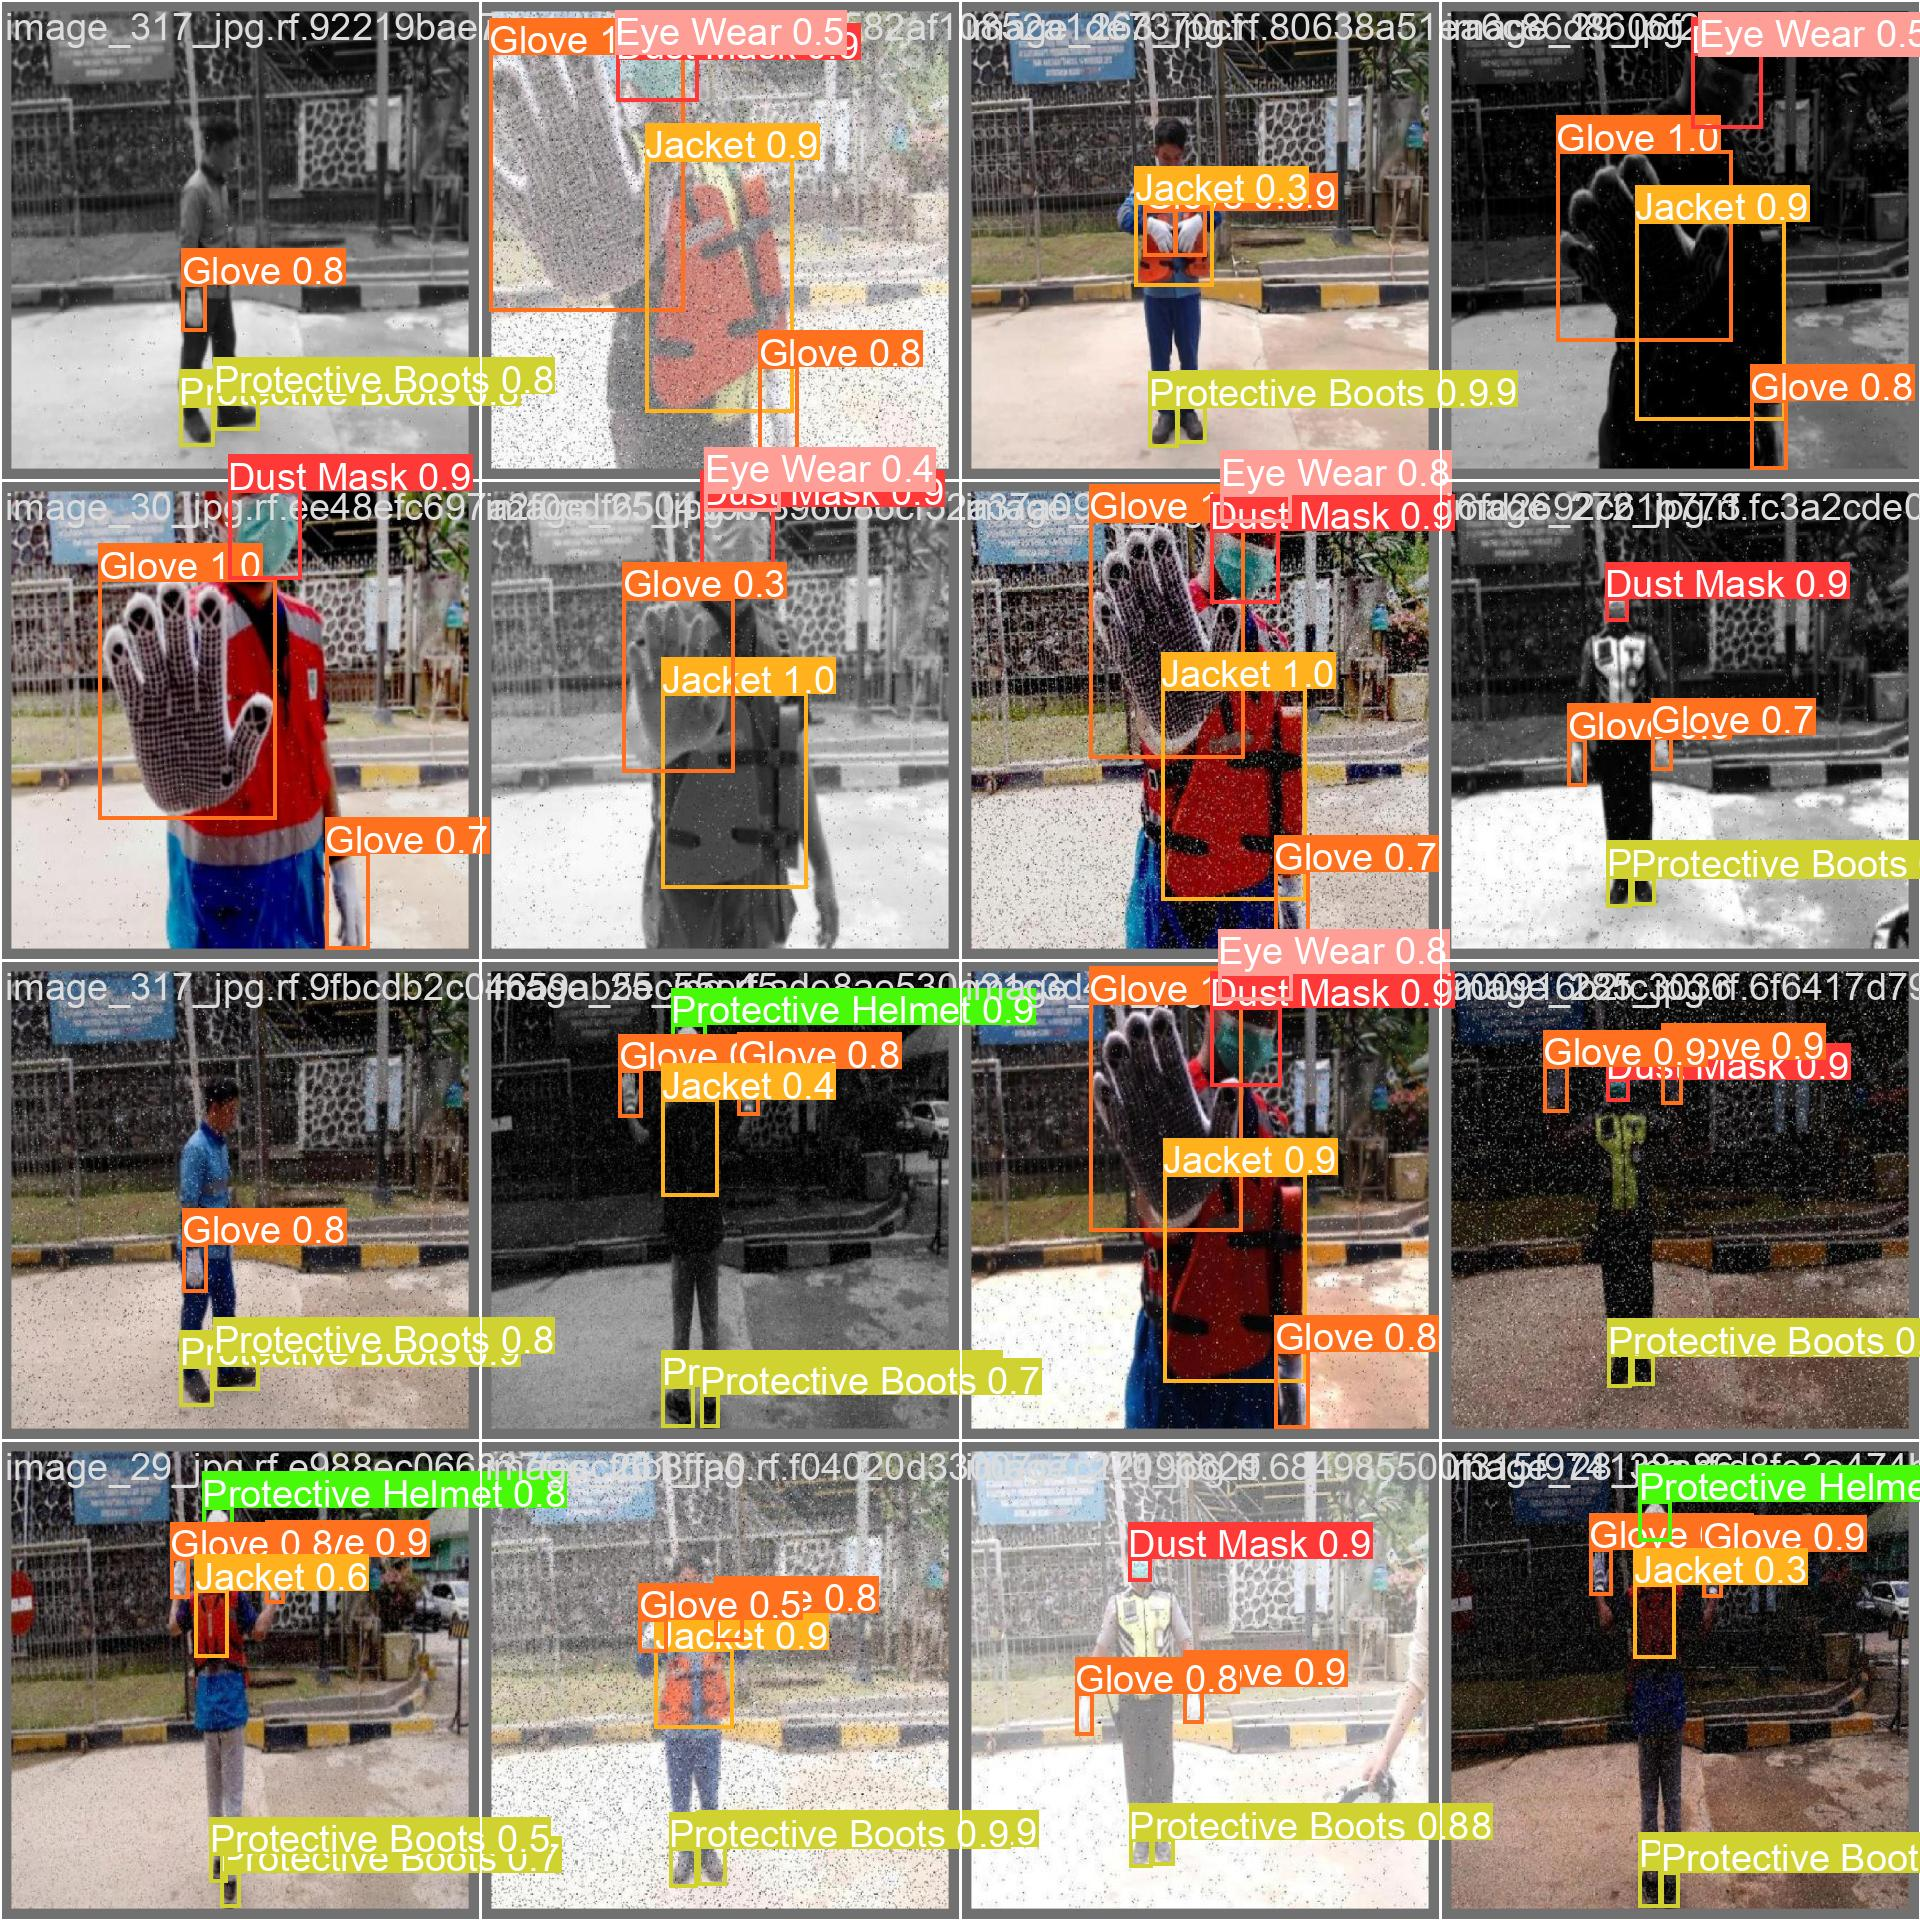

In [22]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch1_pred.jpg", width=1000)

In [25]:
!python val_dual.py --data 'PPE_Detection-1/data.yaml' --img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 --weights 'runs/train/yolov9-e-finetuning/weights/best.pt'

val_dual: data=PPE_Detection-1/data.yaml, weights=['runs/train/yolov9-e-finetuning/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-95-g493e523 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50712138 parameters, 0 gradients, 236.7 GFLOPs
val: Scanning /content/yolov9/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 41/41 [00:47<00:00,  1.16s/it]
                   all        649       3126       0.93      0.787      0.865      0.587
             Dust Mask        649        311      0.945      0.859 

In [37]:
# Video
# !gdown "https://drive.google.com/uc?id=1thUMGC2OaBUpA9JFb0hW7qmF_znY2GxR&confirm=t"

# Image
!gdown "https://drive.google.com/uc?id=1ud4RuWvPGni-B1yNc7CBDAl7I1EgNH2O&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ud4RuWvPGni-B1yNc7CBDAl7I1EgNH2O&confirm=t
To: /content/yolov9/IMG_1357_jpg.rf.7a0598a31a08062d7905067496f32a93.jpg
100% 52.0k/52.0k [00:00<00:00, 88.0MB/s]


In [34]:
# Video
!python detect_dual.py --source 'istockphoto-693033804-640_adpp_is.mp4' --img 640 --device 0 --weights 'runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_result_video

detect_dual: weights=['runs/train/yolov9-e-finetuning/weights/best.pt'], source=istockphoto-693033804-640_adpp_is.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_result_video, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-95-g493e523 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50712138 parameters, 0 gradients, 236.7 GFLOPs
video 1/1 (1/327) /content/yolov9/istockphoto-693033804-640_adpp_is.mp4: 384x640 10 Jackets, 3 Protective Helmets, 155.8ms
video 1/1 (2/327) /content/yolov9/istockphoto-693033804-640_adpp_is.mp4: 384x640 10 Jackets, 3 Protective Helmets, 49.5ms
video 1/1 (3/327) /content/yolov9/istockpho

In [39]:
# Image
!python detect_dual.py --source 'IMG_1357_jpg.rf.7a0598a31a08062d7905067496f32a93.jpg' --img 640 --device 0 --weights 'runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_result_image

detect_dual: weights=['runs/train/yolov9-e-finetuning/weights/best.pt'], source=IMG_1357_jpg.rf.7a0598a31a08062d7905067496f32a93.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_result_image, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-95-g493e523 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 604 layers, 50712138 parameters, 0 gradients, 236.7 GFLOPs
image 1/1 /content/yolov9/IMG_1357_jpg.rf.7a0598a31a08062d7905067496f32a93.jpg: 640x640 1 Jacket, 1 Protective Helmet, 81.0ms
Speed: 0.6ms pre-process, 81.0ms inference, 666.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov9_result_image2


In [57]:
from IPython.display import HTML
from base64 import b64encode
import os

save_path = 'runs/detect/yolov9_result_video4/video_result.mp4'
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width="600" controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

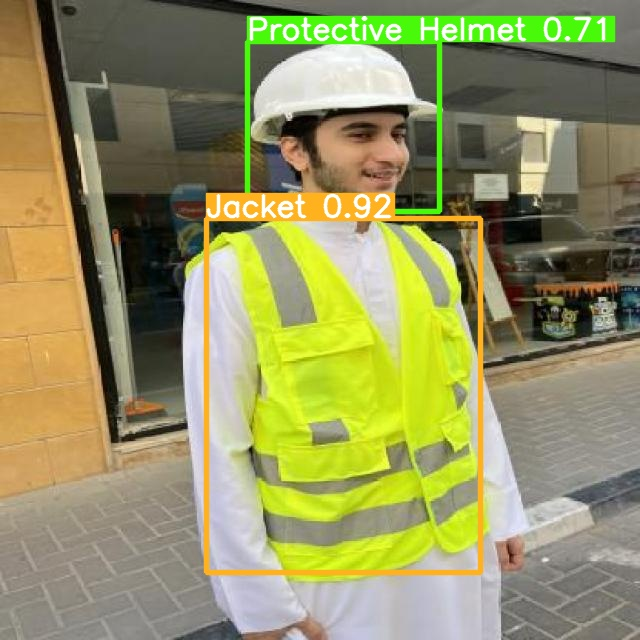

In [49]:
from IPython.display import Image, display

image_path = 'runs/detect/yolov9_result_image2/IMG_1357_jpg.rf.7a0598a31a08062d7905067496f32a93.jpg'

display(Image(filename=image_path))